# __Task:__  Exploring segmenting  approaches

____________________

__Intall Python and required packages__

Suggested alternative: install Conda, create an environment with python and then run the notebook using jupyter lab.

Quick install and some tips at Linux:

1) download miniconda installer:

wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh

2) install

bash Miniconda3-latest-Linux-x86_64.sh

3) Install supports for jupyter lab (more details at "https://github.com/jupyterlab/jupyterlab")

conda install -c conda-forge jupyterlab

4) create an environment (default Python 3.6.5)

conda create --name py36

5) open the environment and required packages

source activate py36

conda install -c numpy scipy matplotlib pandas scikit-learn ipython nbconvert tensorflow keras nb_conda opencv

conda install nb_conda 6) Finally, open jupyter lab and run the notebook(.ipynb)

For more information "https://conda.io/docs/user-guide/install/index.html"

### Python wrapper for ImageJ
https://github.com/imagej/pyimagej

conda install pyimagej openjdk=8

#also install maven
https://maven.apache.org/download.cgi
https://maven.apache.org/install.html


### Links with documentation pyimagej:
https://github.com/imagej/pyimagej

https://nbviewer.jupyter.org/github/imagej/tutorials/blob/master/notebooks/1-Using-ImageJ/6-ImageJ-with-Python-Kernel.ipynb

https://github.com/mpinkert/Notebooks/blob/master/Examples/Rigid%20registration%20with%20pyimagej.ipynb

https://nbviewer.jupyter.org/github/imagej/tutorials/tree/master/notebooks/

https://nbviewer.jupyter.org/github/imagej/tutorials/blob/master/notebooks/ImageJ-Tutorials-and-Demo.ipynb

https://github.com/imagej/pyimagej/blob/master/test/test_imagej.py

https://imagej.net/Jython_Scripting


### Other Approaches
https://github.com/arve0/fijibin

https://imagej.net/ImageJ2_Python_Scripts

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-017-1934-z

https://www.youtube.com/watch?v=v0q88SisBtw

https://github.com/imglib/imglyb-examples/tree/master/imglyb_examples

https://stackoverflow.com/questions/29749687/how-to-connect-imagej-to-python







__________
## 1) Running a MACROS using ImageJ windoManager

In [1]:
pathToImage= 'data/images/input/IMG_0057.JPG'

In [2]:
import sys
from pathlib import Path
sys.path.append(str(Path.home())+'/Documents/CODE/LOCAL/src')

In [3]:
from py_packages.dataVis.showImage import showRGBFromArray 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import imagej
ij = imagej.init('../Fiji.app' , headless=False )

Added 388 JARs to the Java classpath.


### Running

In [6]:
from jnius import autoclass
WindowManager = autoclass('ij.WindowManager')

In [7]:
# load the image into IJ
ij_img = ij.io().open(pathToImage)

In [8]:
img_array = np.moveaxis(ij.py.from_java(ij_img), 0, -1).astype(int)

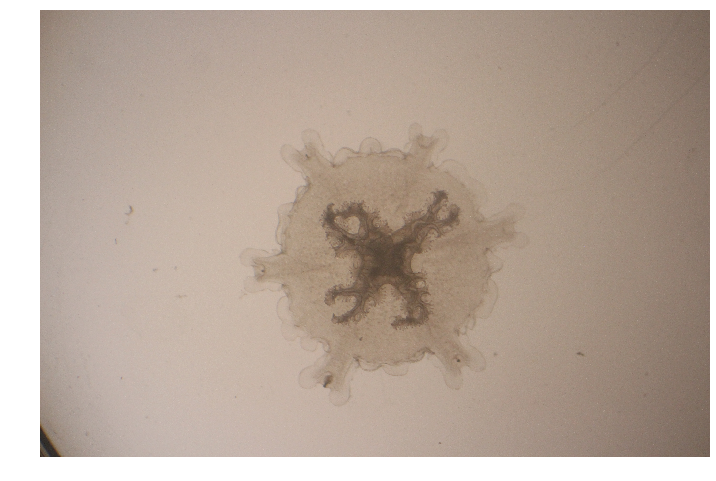

In [9]:
showRGBFromArray(img_array, h=12, w=12)

### Using window Manager to RUN MACROS

In [58]:
ij.ui().showUI()
ij.ui().show('image',ij_img) 

In [57]:
macro = """
            selectWindow("image");
            setTool("rectangle");
            waitForUser("Waiting for user to draw a Rectangle. Press Okay to continue....");
            run("Crop");
            run("8-bit");
            run("Enhance Contrast...", "saturated=0.3 equalize"); 
            run("Subtract Background...", "rolling=50 light create sliding");
            run("Gaussian Blur...", "sigma=5");
            run("Make Binary", "method=Otsu background=Default calculate");
            run("Erode", "stack");
            run("Dilate", "stack");
            run("Invert", "stack");
            run("Find Edges");
            
            run("Erode", "stack");
            run("Dilate", "stack");            
            run("Mean...", "radius=30 stack");
            run("Make Binary", "method=Otsu background=Default calculate");
            run("Fill Holes");

        """

   

In [59]:
ij.py.run_macro( macro )
result = WindowManager.getCurrentImage()
result.changes = False

In [13]:
img_array = np.moveaxis(ij.py.from_java(ij_img), 0, -1).astype(int)

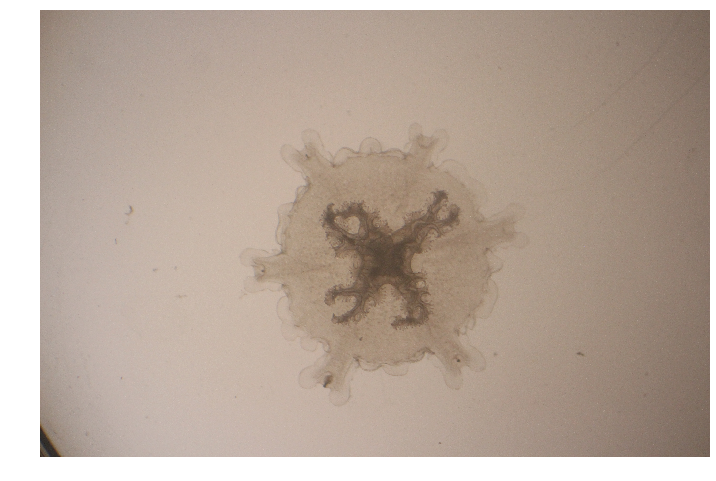

In [14]:
showRGBFromArray(img_array, h=12, w=12)

In [1]:
#Close the windows in Fiji.
WindowManager.closeAllWindows()

NameError: name 'WindowManager' is not defined

______________

## 2) Running a MACROS using ImageJ windoManager

In [17]:
print( help(ij.op()))

Help on net.imagej.ops.OpService in module jnius.reflect object:

class net.imagej.ops.OpService(jnius.JavaClass)
 |  Main class to do introspection.
 |  
 |  Method resolution order:
 |      net.imagej.ops.OpService
 |      jnius.JavaClass
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  coloc = <jnius.JavaMethod object>
 |  compareTo = <jnius.JavaMultipleMethod object>
 |  convert = <jnius.JavaMethod object>
 |  copy = <jnius.JavaMethod object>
 |  create = <jnius.JavaMultipleMethod object>
 |  deconvolve = <jnius.JavaMethod object>
 |  dispose = <jnius.JavaMethod object>
 |  eval = <jnius.JavaMultipleMethod object>
 |  filter = <jnius.JavaMethod object>
 |  geom = <jnius.JavaMethod object>
 |  getContext = <jnius.JavaMethod object>
 |  getIdentifier = <jnius.JavaMethod object>
 |  getInfo = <jnius.JavaMethod object>
 |  getLocation = <jnius.JavaMethod object>
 |  getPluginService = <jnius.JavaMethod object>
 |  getPluginType = <jnius.JavaMethod object>
 |  getPlugins 

In [39]:
print( help(ij.op().filter()))
#print( help(ij.op().threshold()))
#print( help(ij.op().image()))
#print( help(ij.op().morphology()))
#print( help(ij.op().topology()))
#print( help(ij.op().transform()))
#print( help(ij.op().ops()))
#print( help(ij.op().deconvolve()))
#print( help(ij.op().imagemoments()))
#print( help(ij.op().log()))

Help on net.imagej.ops.filter.FilterNamespace in module jnius.reflect object:

class net.imagej.ops.filter.FilterNamespace(jnius.JavaClass)
 |  Main class to do introspection.
 |  
 |  Method resolution order:
 |      net.imagej.ops.filter.FilterNamespace
 |      jnius.JavaClass
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  addNoise = <jnius.JavaMultipleMethod object>
 |  addPoissonNoise = <jnius.JavaMultipleMethod object>
 |  allPartialDerivatives = <jnius.JavaMethod object>
 |  bilateral = <jnius.JavaMethod object>
 |  convolve = <jnius.JavaMultipleMethod object>
 |  correlate = <jnius.JavaMultipleMethod object>
 |  createFFTOutput = <jnius.JavaMultipleMethod object>
 |  derivativeGauss = <jnius.JavaMethod object>
 |  dog = <jnius.JavaMultipleMethod object>
 |  equals = <jnius.JavaMethod object>
 |  fft = <jnius.JavaMultipleMethod object>
 |  fftSize = <jnius.JavaMultipleMethod object>
 |  frangiVesselness = <jnius.JavaMethod object>
 |  gauss = <jnius.JavaMultipleM

In [34]:
# Print is required to render newlines
print(ij.op().help('filter.gauss'))

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.gauss.DefaultGaussRA(
		RandomAccessibleInterval out,
		RandomAccessible in,
		double[] sigmas)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.GaussRAISingleSigma(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double sigma,
		OutOfBoundsFactory outOfBounds?)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.DefaultGaussRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double[] sigmas,
		OutOfBoundsFactory outOfBounds?)


_____

### Import an image with scikit-image.

In [20]:
import skimage
from skimage import io

img = io.imread(pathToImage)
# import numpy as np
# img = np.mean(img, axis=2)

In [21]:
img.shape

(3456, 5184)

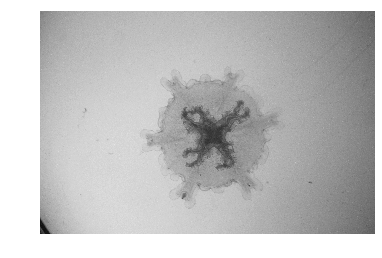

In [22]:
#ij.py.show(img, cmap = 'gray')
showRGBFromArray(img) 

### Import an image with pyimagej.

In [23]:
# Load the image
imgj= ij.io().open(pathToImage)
# Send it to numpy
img2 = np.moveaxis(ij.py.from_java(imgj), 0, -1)

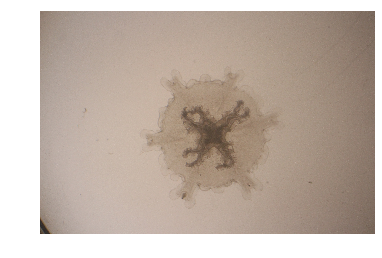

In [24]:
# Display the image
#ij.py.show(img2, cmap = 'gray')
showRGBFromArray(img2.astype(int)) 

### Applying transformations

In [25]:
img3 = ij.op().filter().gauss( ij.py.to_java(img2), 25)

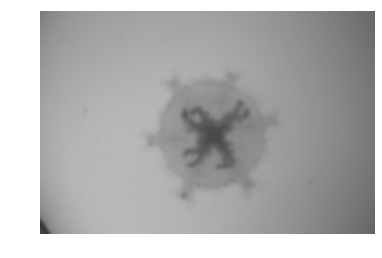

In [32]:
showRGBFromArray(ij.py.from_java(img3).astype(int)) 